___

<img src="imagenes/logoeon.png" alt="EON" width="150"/>
___

# Proyecto de M.L. End to End

Vamos a ver como se realiza un proyecto de M.L. de manera general y cuales son los pasos que debemos tomar:

1) Mire el panorama completo

2) Obtenga la data

3) Descubra y visualice los datos para obtener información

4) Preparar los datos para los algoritmos de Machine Learning

5) Seleccione un modelo y entrénelo

6) Afina tu modelo

7) Presente su solución

8) Inicie, supervise y mantenga su sistema

## 1. Mire el panorama completo
A continuación le dejamos una lista de cosas que puede verificar en esta etapa del proyecto

1. Definir el objetivo en términos de negocio.
2. ¿Cómo se utilizará su solución?
3. ¿Cuáles son las soluciones actuales (si las hay)?
4. ¿Cómo debe enmarcar este problema (supervisado/no supervisado, on line/batch, etc.)?
5. ¿Cómo debe medirse el desempeño?
* ¿Cuál sería el rendimiento mínimo necesario para alcanzar el objetivo empresarial?
* ¿Cuáles son los problemas comparables? ¿Se puede reutilizar la experiencia o las herramientas?
* ¿Existe experiencia disponible de otras personas?

**Vamos a construir un modelo de precios de vivienda en california a partir de datos obtenidos en un censo, el modelo debe aprender de esta data y debe ser capaz de predecir el precio medio de la vivienda a partir de otras metricas.**

### Obtener el marco del problema
Primero debemos preguntar que exactamente se espera con el proyecto, y que espera la compañia respecto a los beneficios del modelo, deberia tener claro cual va a ser la salida del modelo y el desempeño optimo esperado, en este caso el objetivo es obtener el **precio medio de vivienda**

El problema lo vamos a abordar mediante, supervisado, no supervisado, regresión, classificación, batch learning, online learning?

### Seleccionar una medida de desempeño
Una tipica medida para problemas de regresión es el Root Mean Square Error (RMSE), nos da una idea de como el error del sistema tipicamente hace predicciones, con alto peso en grandes errores

 $RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{({x_i -y_i})^2}}$
 
 Donde:
 * n es el numero es intancias en el dataset
 * x(i) es el vector con todos los valores de caracteristicas excluyendo labels
 * y(i) son los valores deseados para la instancia, salida
 
 **Nota: RMSE es generalmente utilizado para medir las tareas de regresion, pero supongamos que tenemos muchos distritos con valores atipicos, podrias querer utilizar el MAE (Mean Absolute Error)** 
 
  $MAE = {\frac{1}{n}\Sigma_{i=1}^{n}{|{x_i -y_i}|}}$
  
  Tanto RMSE como MAE son formas de medir la distancia entre dos vectores, entre el de predicción y los valores objetivos.

### Chequee sus suposiciones
Hay que preguntarnos si realmente necesitamos los valores predichos, de viviendas en California o simplemente podemos segmentar los precios en categorias distintas, barato, medio o caro. en este caso deberiamos cambiar de un modelo de regresión a uno de clasifiación. Sin embargo vamos a continuar necesitando los valores predichos.

## 2. Obtenga la data
A continuación le dejamos un checklist de cosas que hacer en este paso:

1. Enumere los datos que necesita y la cantidad que necesita.
2. Busque y documente dónde puede obtener esos datos.
3. Compruebe cuánto espacio ocupará.
4. Verifique las obligaciones legales y obtenga la autorización si es necesario.
5. Obtener autorizaciones de acceso.
6. Crear un espacio de trabajo (con suficiente espacio de almacenamiento).
7. Conseguir los datos.
8. Convierta los datos a un formato que pueda manipular fácilmente (escalar).
9. Asegúrese de que la información confidencial sea borrada o protegida (anonimizada, GPRD-General Data Protection Regulation).
10. Compruebe el tamaño y el tipo de datos (series temporales, muestras, datos geográficos, etc.).
11. Muestre un conjunto de pruebas, póngalo a un lado.


### Obteniendo datos del mundo real

Cuando trabajamos en proyectos de M.L. lo mejor es experimentar con datos del mundo real
Aqui algunos repositorios populares

* [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
* [Kaggle datasets](https://www.kaggle.com/datasets)
* [Amazon’s AWS datasets](https://registry.opendata.aws/)
* http://dataportals.org/
* http://opendatamonitor.eu/
* http://quandl.com/
* [Wikipedia’s list of Machine Learning datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)
* [Quora.com question](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
* [Datasets subreddit](https://www.reddit.com/r/datasets)
* [Datos abiertos Ecuador](http://catalogo.datosabiertos.gob.ec/)

### Creando un Workspace
Es importante tener un espacio de trabajo adecuado en nuestra computadora para nuestros proyectos de M.L. 

Si trabajamos con diferentes proyectos de M.L. es muy importante tener ambientes separados para no tener conflictos con versiones, una herramienta muy utilizada es utilizar virtualenv:

### Descargando la data y cargando a un dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
type(housing)

pandas.core.frame.DataFrame

### Mirar rapidamente la estructura de datos

Determinar cuales son los atributos del dataset

In [4]:
# Observamos las primeras 5 filas del dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.shape

(20640, 10)

In [6]:
# el método info nos muestra una breve descripción de la data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Podemos observar que el atributo **total_bedrooms** tiene solo 20433 valores non-null lo que quiere decir que 207 valores estan perdidos de esta caracteristica, tenemos que tener cuidado con esto a posteriori.

Otra cosa importante es notar que **ocean_proximity** tiene valores tipo objeto (no numericos) y al parecer los valores son repetitivos, se los podria enmarcar dentro de un atributo tipo categoria, nos podemos asegurar usando el metodo **value_counts()**

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Ahora vamos a ver los otros campos, para esto nos ayuda mucho el metodo **describe()**

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Los valores que obtenemos en las columnas numéricas son:
* count: Cuenta los valores non-null
* mean: obtiene la media
* std: desviación estandar, nos dice que tan dispersos estan los datos
* min: valor minimo en la columna
* 25%: Primer cuartil el porcentaje de casas que estan por debajo de los 18 años en housing_median_age
* 50%: Mediana, el porcentaje de casas que estan por debajo de 29 años
* 75%: Tercer cuartil, el porcentaje de casas que estan debajo de los 37 años
* max: el valor máximo en la columna

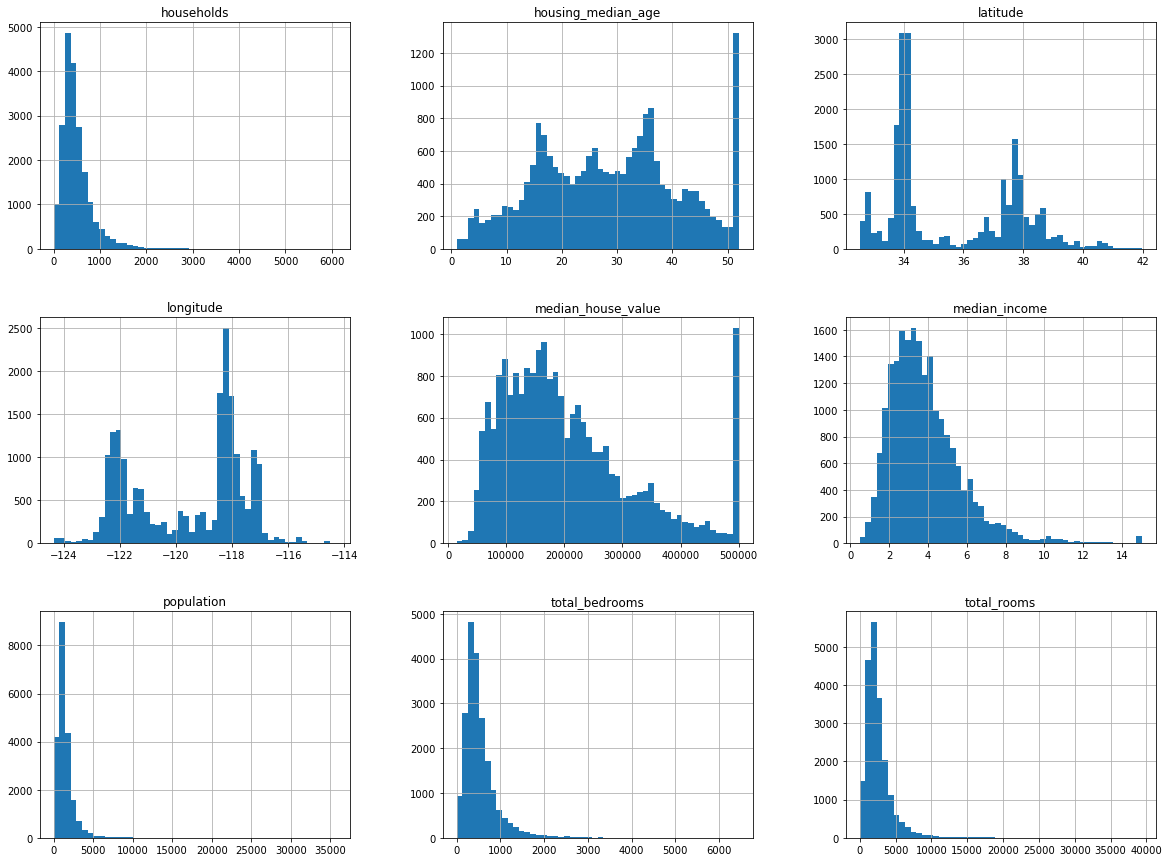

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

De los histogramas podemos observar algunas situaciones interesantes:
1. El valor de median_income parece que no esta expresado en dolares, si no mas bien ha sido escalado y limitado, trabajar con estos valores escalados no supone un problema, pero sin embargo deberia entender como los datos fueron computados. Para eso es recomendable hablar con la gente que recogió la data.
2. Los atributos de housing_media_age y median_housing_value tambien han sido limitados, al ser median_housing_value tu atributo objetivo el sistema puede aprender que los precios nunca van mas allá del limite de $500000$, si su cliente desea obtener valores superiores al que posee la data, se tienen dos opciones:
    * Recoger de manera adecuada los valores que han sido limitados
    * Remover esos valores de distritos del set de entrenamiento para que no evalue de manera incorrecta cuando los valores superen  los $500000$

* Estos atributos tienen diferentes escalas, para eso vamos a ver un tema orientado al escalamiento de features
* Por otro lado muchos histogramas se extienden mucho hacia la derecha de la mediana, lo que puede hacer dificil para algunos algoritmos de M.L. detectar patrones, a posterior vamos a intentar transformar esos atributos a una figura mas acampanada (distribucion normal)

### Crear el dataset

Puede ser poco intuitivo escoger los datos en este punto, debido a que apenas hemos revisado los mismos de manera rápida. Pero la verdad es que si usted estima el error de los datos utilizando toda la data de prueba, usted caerá en un problema común denominado sesgo en generalización de datos. Ya que los resultados serán muy optimistas.

Para evitar eso lo que se necesita es como minimo dividir los datos en set de entrenamiento, prueba y validación. (train, test, validation)

* El train data contine la mayoria de datos y será utilizado para el entrenamiento, se estima de entre 70%-95% de la muestra será utilizado en este data set

* El test data contine el resto de datos que no fueron escogidos para entrenamiento 5%-30% y esta data sirve para tener una estimación de error mas efectiva sobre los datos obtenidos por nuestro modelo ya entrenado

* Validation data por otro lado son datos extraidos del train data con los que se prueba el modelo, tiene una función similar al test data y sirve para obtener mayor fiabilidad en la medición del error de nuestro modelo

Por ahora nos centraremos solo en los dos primeros train y test.
Para hacer una división adecuada **Scikit-Learn** nos brinda una funcion muy buena para hacer este tipo de división **train_test_split**, esta función tiene dos caracteristicas importantes:
1. random_state que nos permite generar una eleccion mediante permutación pseudo randomica
* Se puede pasar multiples datasets con identico numero de filas y hacer un split en los mismos indices

In [10]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, 
                                       test_size=0.2, 
                                       random_state=667)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10471,-117.72,33.49,4.0,3623.0,734.0,1129.0,530.0,5.7281,500001.0,<1H OCEAN
6876,-118.10,34.07,36.0,1240.0,349.0,1383.0,338.0,2.4931,170300.0,<1H OCEAN
18065,-122.04,37.24,24.0,1521.0,209.0,539.0,192.0,11.1557,500001.0,<1H OCEAN
15459,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0,NEAR OCEAN
14886,-117.08,32.63,28.0,2080.0,427.0,1266.0,434.0,2.2788,146300.0,NEAR OCEAN


Estos muestreos puramente aleatorios son utiles especialmente cuando tenemos un dataset grande, pero caso contrario puede generar un sesgo significativo en la toma de datos.

Por ejemplo: si la población de Ecuador en hombres es del 49% y mujeres 51% y se toman muestrar a 100 personas, se deberia asegurar que 49 muestras representen a hombres y 51 muestras representen a las mujeres, a este proceso se le conoce como estratificación.

Sklearn tiene una funcion conocida como:

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

permite hacer la estratificación de datos en nuestro dataframe a categorias numéricas. Esto lo veremos con más detalle a posterior.

## 3. Descubra y visualice los datos para obtener información
A continuación le dejamos una lista de cosas que puede verificar en esta etapa del proyecto

1. Cree una copia de los datos para la exploración (muestreándolos a un tamaño manejable si es necesario).
2. Cree un cuaderno Jupyter para mantener un registro de su exploración de datos.
3. Estudiar cada atributo y sus características: 
    * Nombre 
    * Tipo (categoria, int/float, texto, etc.) 
    * % Valores perdidos 
    * Ruido y tipo de ruido (estocástico, valores atípicos, errores de redondeo, etc.) 
    * Tipo de distribución (gaussiana, uniforme, logarítmica, etc.)
4. Para las tareas de aprendizaje supervisado, identifique los atributos objetivo.
5. Visualizar los datos.
6. Estudiar las correlaciones entre atributos.
7. Estudie cómo resolvería el problema manualmente.
8. Identifique las transformaciones prometedoras que podría querer aplicar.
9. Identificar los datos adicionales que serían útiles (volver a "Obtener la data").
10. Documente lo que ha aprendido.
___
Si tenemos datos manejables como en este caso, primero deberiamos hacer una copia del dataset de entrenamiento para manipular los datos sin riesgo:

In [12]:
housing = train_set.copy()

### Visualizar los datos
En este caso tenemos información geografica, latitud y longitud, es una buena idea crear un scatterplot de todos los distritos para visualizar la data:

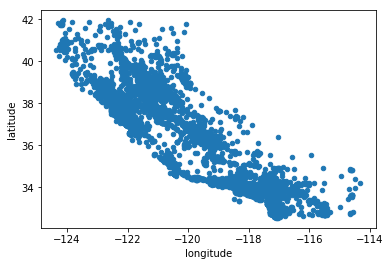

In [13]:
housing.plot(kind="scatter", x = "longitude", y="latitude")

Tiene la forma del estado de california, de hecho asi debe ser ya que los datos son tomados de ese censo.
Como hago si deseo ver las zonas mas densamente pobladas?

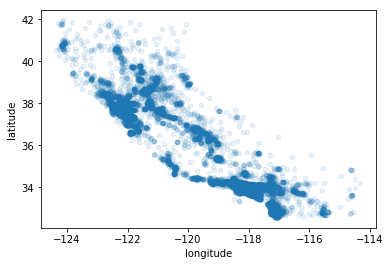

In [14]:
# que debemos agregar para observar de manera gráfica la densidad?
housing.plot(kind="scatter", x = "longitude", y="latitude", alpha=0.1)

Ahora seria bueno saber la densidad de la población mediante un mapa de colores

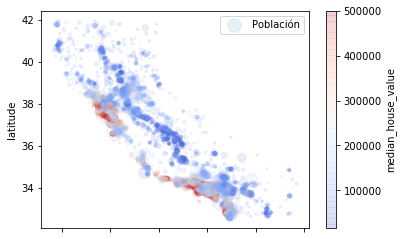

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, 
                        s=housing["population"]/100, #poblacion por distrito
                        label="Población",
                        c = "median_house_value", # color que representa el precio
                        cmap = plt.get_cmap("coolwarm"),
                        colorbar = True)

Vemos que mientras mas cerca estan de la costa su precio es mas alto, y principlamente en dos puntos, asi que el atributo de proximidad al oceano puede ser util en este caso.

Podria ser interesante aplicar un algoritmo de clusterizado para agregar nuevas caracteristicas que midan la proximidad al centro del cluster

### Buscando correlaciones
Podemos utilizar el coeficiente de correlacion estandar utilizando el método **corr()**

In [16]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924092,-0.109633,0.042519,0.067359,0.097909,0.053093,-0.016629,-0.047955
latitude,-0.924092,1.000000,0.012591,-0.032766,-0.063549,-0.105684,-0.067551,-0.079377,-0.142644
housing_median_age,-0.109633,0.012591,1.000000,-0.364028,-0.323239,-0.296735,-0.305607,-0.120438,0.104900
total_rooms,0.042519,-0.032766,-0.364028,1.000000,0.931735,0.858805,0.921126,0.198863,0.130340
total_bedrooms,0.067359,-0.063549,-0.323239,0.931735,1.000000,0.878200,0.980718,-0.006611,0.045002
population,0.097909,-0.105684,-0.296735,0.858805,0.878200,1.000000,0.906102,0.006247,-0.027930
households,0.053093,-0.067551,-0.305607,0.921126,0.980718,0.906102,1.000000,0.014388,0.061021
median_income,-0.016629,-0.079377,-0.120438,0.198863,-0.006611,0.006247,0.014388,1.000000,0.687635
median_house_value,-0.047955,-0.142644,0.104900,0.130340,0.045002,-0.027930,0.061021,0.687635,1.000000


In [17]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687635
total_rooms           0.130340
housing_median_age    0.104900
households            0.061021
total_bedrooms        0.045002
population           -0.027930
longitude            -0.047955
latitude             -0.142644
Name: median_house_value, dtype: float64

El más prometedor atributo para predecir el valor medio de la casa es el ingreso medio, asi que vamos a dibujar un scatter plot

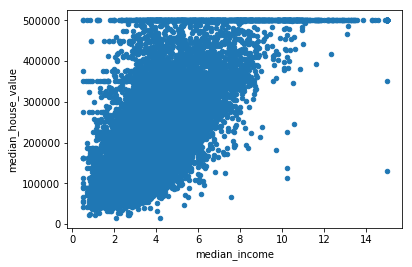

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value")

Aqui podemos notar algunas cosas, claramente la linea en 50000 que ya habiamos notado que era un tope, pero asi mismo otras lineas menos obvias que seria interesante intentar eliminar para que el algoritmo no aprenda estos valores

### Experimentando con combinaciones de atributos
Es muy interesante que podamos buscar combinaciones de atributos para ver si podemos obtener relaciones mas fuerte combinando los mismos.
Se les propone crear relaciones de atributos entre:
* "total_rooms" vs "households" almacenar en una columna llamada "room_vs_household
* "total_bedrooms" vs "total_rooms" almacenar en una columna llamada "bedrooms_vs_room"
* "population" vs "households" almacenar en una columna llamada "population_vs_households"

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10471 to 213
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16343 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [20]:
housing["rooms_vs_household"] = housing \
    ["total_rooms"]/housing["households"]

housing["bedrooms_vs_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_vs_household"]= housing["population"]/housing["households"]

In [21]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687635
rooms_vs_household         0.151415
total_rooms                0.130340
housing_median_age         0.104900
households                 0.061021
total_bedrooms             0.045002
population_vs_household   -0.021944
population                -0.027930
longitude                 -0.047955
latitude                  -0.142644
bedrooms_vs_room          -0.255375
Name: median_house_value, dtype: float64

Excelente, podemos observar que un nuevo atributo que introducimos room_vs_household esta mayormente correlacionado con nuestra medida objetivo

Recuerde que este proceso de descubrimiento de la data, es un proceso iterativo, y lo puede repetir multiples veces para ganar mucha más valiosa información, mejorando su prototipo de proyecto

## 4. Prepara la data para los algoritmos de M.L.

Para la preparación de datos es altamente recomendable escribas funciones que lo hagan automaticamente, estas sson algunas razones:
* Puede reproducir las transformaciones facilmente en cualquier dataset
* Puedes poco a poco ir construyendo una libreria de trasnformaciones que puedes volver a usar en futuros proyectos
* Puedes usar esas funciones para tu sistema on line antes de que los datos alimenten a los algoritmos
* Hará posible que tu facilmente pruebes varias combinaciones y probar cual es la mejor

Aqui le dejamos una lista de cosas que podemos hacer en este punto:

1. Limpieza de datos:
    * Corrija o elimine los valores atípicos.
    * Rellene los valores que faltan (por ejemplo, con cero, media, mediana...).
2. Selección de características:
    * Elimine los atributos que no proporcionan información útil para la tarea.
3. Ingeniería de características, cuando proceda:
    * Discretizar las funciones continuas.
    * Descomponer características (por ejemplo, fecha/hora).
4. Escalado de características: estandarizar o normalizar características.

### Limpieza de datos
Recordemos que tenemos ahora atributos con missing values, esto afecta negativamente nuestro rendimiento en los modelos.

Para solucionarlo tenemos las siguientes opciones:
* Deshacerse de los distritos correspondientes.
* Deshacerse de todo el atributo.
* Establezca los valores en algún valor (cero, la media, la mediana, etc.).

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10471 to 213
Data columns (total 13 columns):
longitude                  16512 non-null float64
latitude                   16512 non-null float64
housing_median_age         16512 non-null float64
total_rooms                16512 non-null float64
total_bedrooms             16343 non-null float64
population                 16512 non-null float64
households                 16512 non-null float64
median_income              16512 non-null float64
median_house_value         16512 non-null float64
ocean_proximity            16512 non-null object
rooms_vs_household         16512 non-null float64
bedrooms_vs_room           16343 non-null float64
population_vs_household    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


Primero vamos a dividir los datos en la data efectiva para entrenamiento y las que van a ser objetivos

In [23]:
housing = housing.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

Obtenemos un muestreo de los valores que tenemos null

In [24]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_vs_household,bedrooms_vs_room,population_vs_household
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,<1H OCEAN,4.525114,NaN,3.273973
3921,-118.56,34.20,35.0,2273.0,NaN,1431.0,403.0,4.0789,<1H OCEAN,5.640199,NaN,3.550868
19402,-120.93,37.73,14.0,2799.0,NaN,2294.0,596.0,2.6343,INLAND,4.696309,NaN,3.848993
16880,-122.39,37.59,32.0,4497.0,NaN,1846.0,715.0,6.1323,NEAR OCEAN,6.289510,NaN,2.581818
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,INLAND,4.372014,NaN,4.856655
...,...,...,...,...,...,...,...,...,...,...,...,...
14331,-117.15,32.72,51.0,1321.0,NaN,781.0,499.0,1.3071,NEAR OCEAN,2.647295,NaN,1.565130
15137,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,<1H OCEAN,6.035963,NaN,2.917633
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN,5.138418,NaN,3.211864
7330,-118.17,33.98,41.0,756.0,NaN,873.0,212.0,2.7321,<1H OCEAN,3.566038,NaN,4.117925


Vamos a escoger la opcion de rellenar los datos con algun valor, en este caso vamos a escoger la mediana, una funcion importante que tiene Sklearn es **SimpleImputer**

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
# Como imputer solo realiza valores en atributos numericos 
# vamos a eliminar la columna "ocean_proximity"
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_vs_household,bedrooms_vs_room,population_vs_household
10471,-117.72,33.49,4.0,3623.0,734.0,1129.0,530.0,5.7281,6.835849,0.202595,2.130189
6876,-118.10,34.07,36.0,1240.0,349.0,1383.0,338.0,2.4931,3.668639,0.281452,4.091716
18065,-122.04,37.24,24.0,1521.0,209.0,539.0,192.0,11.1557,7.921875,0.137410,2.807292
15459,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,6.042193,0.172904,2.748105
14886,-117.08,32.63,28.0,2080.0,427.0,1266.0,434.0,2.2788,4.792627,0.205288,2.917051
...,...,...,...,...,...,...,...,...,...,...,...
13815,-117.22,34.44,5.0,4787.0,910.0,1944.0,806.0,2.6576,5.939206,0.190098,2.411911
14180,-117.06,32.72,31.0,2669.0,514.0,1626.0,499.0,3.1923,5.348697,0.192581,3.258517
14425,-117.25,32.80,37.0,1096.0,260.0,490.0,267.0,3.2663,4.104869,0.237226,1.835206
6543,-118.02,34.06,26.0,2929.0,970.0,3792.0,817.0,2.2577,3.585067,0.331171,4.641371


In [27]:
# Entrenamos el imputer
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
# Procedemos a la transformacion
X = imputer.transform(housing_num)

In [29]:
X

array([[-117.72      ,   33.49      ,    4.        , ...,    6.83584906,
           0.20259453,    2.13018868],
       [-118.1       ,   34.07      ,   36.        , ...,    3.66863905,
           0.28145161,    4.09171598],
       [-122.04      ,   37.24      ,   24.        , ...,    7.921875  ,
           0.1374096 ,    2.80729167],
       ...,
       [-117.25      ,   32.8       ,   37.        , ...,    4.10486891,
           0.23722628,    1.83520599],
       [-118.02      ,   34.06      ,   26.        , ...,    3.58506732,
           0.33117105,    4.64137087],
       [-122.22      ,   37.79      ,   46.        , ...,    4.48956357,
           0.2430262 ,    3.12523719]])

In [30]:
# Almacenamos el dataset transformado en un nuevo dataset
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                                  index = housing.index)

In [31]:
#verificamos la data
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_vs_household,bedrooms_vs_room,population_vs_household
7806,-118.09,33.89,42.0,991.0,435.0,717.0,219.0,4.0926,4.525114,0.203125,3.273973
3921,-118.56,34.20,35.0,2273.0,435.0,1431.0,403.0,4.0789,5.640199,0.203125,3.550868
19402,-120.93,37.73,14.0,2799.0,435.0,2294.0,596.0,2.6343,4.696309,0.203125,3.848993
16880,-122.39,37.59,32.0,4497.0,435.0,1846.0,715.0,6.1323,6.289510,0.203125,2.581818
19833,-119.38,36.53,38.0,1281.0,435.0,1423.0,293.0,1.9602,4.372014,0.203125,4.856655
...,...,...,...,...,...,...,...,...,...,...,...
14331,-117.15,32.72,51.0,1321.0,435.0,781.0,499.0,1.3071,2.647295,0.203125,1.565130
15137,-116.91,32.83,16.0,5203.0,435.0,2515.0,862.0,4.1050,6.035963,0.203125,2.917633
16105,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,5.138418,0.203125,3.211864
7330,-118.17,33.98,41.0,756.0,435.0,873.0,212.0,2.7321,3.566038,0.203125,4.117925


In [32]:
# Observamos que ya no existen missing values
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10471 to 213
Data columns (total 11 columns):
longitude                  16512 non-null float64
latitude                   16512 non-null float64
housing_median_age         16512 non-null float64
total_rooms                16512 non-null float64
total_bedrooms             16512 non-null float64
population                 16512 non-null float64
households                 16512 non-null float64
median_income              16512 non-null float64
rooms_vs_household         16512 non-null float64
bedrooms_vs_room           16512 non-null float64
population_vs_household    16512 non-null float64
dtypes: float64(11)
memory usage: 2.1 MB


### Manejando textos y atributos categoricos

Los algoritmos de M.L. prefieren trabajar con numeros de cualquier manera, vamos a convertir esos textos en numeros

Para eso Scikit-Learn provee un tranformador de esta tarea llamada **LabelEncoder**

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = LabelEncoder()
ocean_cat = housing["ocean_proximity"]


In [35]:
ocean_cat_encod = encoder.fit_transform(ocean_cat)

In [36]:
ocean_cat_encod

array([0, 0, 0, ..., 4, 0, 3])

In [37]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


El principal problema con esta codificación es que asume que los valoes mas cercanos tienen mayor relación con valores lejanos, y esto no siempre puede ser cierto.

Para reprara este problema tenemos los llamados one-hot encoding, su nombre se debe a que cuando es un valor de 1(hot) en otro caso es 0(cold)

Afortunadamente Sklearn tambien tiene este tipo de trasnformación

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder()

In [40]:
ocean_cat_1hot = encoder.fit_transform(ocean_cat_encod.reshape(-1,1))

/home/richi/.local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [41]:
ocean_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A la salida debemos notar que tenemos una matriz SciPy sparse, esto se aplica debido a que si tenemos miles de categorias vamos a tener una matriz llena de ceros gastando espacio en memoria, en su lugar la matriz sparse solo guarda los lugares de los elementos nonzero 

Podemos aplicar ambas tranformaciones, o sea directamente de categorias a enteros utilizando **LabelBinarizer**

In [42]:
from sklearn.preprocessing import LabelBinarizer

In [43]:
encoder = LabelBinarizer()

In [44]:
ocean_cat_1hot = encoder.fit_transform(ocean_cat)

In [45]:
ocean_cat_1hot # devuelve automaticamente un NumpyArray por default

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Transformaciones Customizadas
Scikit-Learn provee muchas transformaciones utiles como hemos visto hasta ahora, pero sin embargo aún asi es necesario crear nuestras propias transformaciones para que se adapten a nuestra data

Un buen ejemplo puede ser intentar realizar una función que combine los atributos, como lo hicimos manualmente en **"Experimentando con combinaciones de atributos"**

**Importante:** Queda de **TAREA** implementar una funcion que nos permita combinar todos  los atributos numéricos en un dataset.

In [46]:
# Aqui su código solución

### Feature Scaling
Una der las más importantes transformaciones que necesitas  aplicar a tu data es feature scaling (escalamiento de caracteristicas), podemos observar en nuestro dataset que el rango de media income va desde 0 a 15 mientras que los demas visiblemente estan en miles.

Existen dos metodos comunes para tener los atributos en la misma escala: min-max scaling y estandarización

* **Min-Max scaling** es muy simple, los valores son re-escalados a un rango entre 0 y 1 (Tipicamente). Scikit-Learn provee un transformador llamado **MinMaxScaler** para hacer este trabajo, uno de sus parametros es *feature_range* en caso de que tu quisieras cambiar el rango a un valor distinto de 0 y 1
* Estandarización es algo distinta, a diferencia de min-max, la estandarización no vincula los valores a un rango específico, lo que puede ser un problema para algunos algoritmos (por ejemplo, las redes neuronales a menudo esperan un valor de entrada que va de 0 a 1). Sin embargo, la estandarización se ve mucho menos afectada por los valores atípicos. Scikit-Learn provee un transformador llamado **StandardScaler** para la estandarización.

### Pipelines de Transformación
Como pudimos observar muchas transformaciones necesitan ser ejecutadas en el orden correcto, para estos caso tenemos la clase **Pipeline** que nos ayuda con las secuencias de transformacion.

Vamos a ver un pipeline para atributos numericos

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.pipeline import FeatureUnion
#permite agregar diferentes pipeline para cada tipo de dato

In [49]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [50]:
#Observamos el dataframe escalado
housing_num_tr = pd.DataFrame(housing_num_tr, columns=housing_num.columns)
housing_num_tr.head()
#housing_prepared.info()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_vs_household,bedrooms_vs_room,population_vs_household
0,0.925486,-1.005135,-1.958300,0.447069,0.465119,-0.260912,0.075225,0.986880,0.554738,-0.176180,-0.083189
1,0.736044,-0.733885,0.576230,-0.642360,-0.450782,-0.039837,-0.423826,-0.726854,-0.694045,1.197983,0.085990
2,-1.228172,0.748637,-0.374219,-0.513896,-0.783838,-0.774434,-0.803313,3.862137,0.982941,-1.312092,-0.024790
3,1.149826,-1.164144,-1.958300,9.723899,8.555979,8.223505,8.985363,0.408183,0.241811,-0.693566,-0.029895
4,1.244547,-1.407333,-0.057403,-0.258340,-0.265223,-0.141671,-0.174301,-0.840378,-0.250874,-0.129236,-0.015323


In [51]:
# unimos las variables categoricas trasnformadas con las 
# numericas trasnformadas
proximity = pd.DataFrame(ocean_cat_1hot)
housing_prepared = pd.concat([housing_num_tr, proximity], axis=1)
print(housing_prepared.shape)
housing_prepared.head()


(16512, 16)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_vs_household,bedrooms_vs_room,population_vs_household,0,1,2,3,4
0,0.925486,-1.005135,-1.958300,0.447069,0.465119,-0.260912,0.075225,0.986880,0.554738,-0.176180,-0.083189,1,0,0,0,0
1,0.736044,-0.733885,0.576230,-0.642360,-0.450782,-0.039837,-0.423826,-0.726854,-0.694045,1.197983,0.085990,1,0,0,0,0
2,-1.228172,0.748637,-0.374219,-0.513896,-0.783838,-0.774434,-0.803313,3.862137,0.982941,-1.312092,-0.024790,1,0,0,0,0
3,1.149826,-1.164144,-1.958300,9.723899,8.555979,8.223505,8.985363,0.408183,0.241811,-0.693566,-0.029895,0,0,0,0,1
4,1.244547,-1.407333,-0.057403,-0.258340,-0.265223,-0.141671,-0.174301,-0.840378,-0.250874,-0.129236,-0.015323,0,0,0,0,1


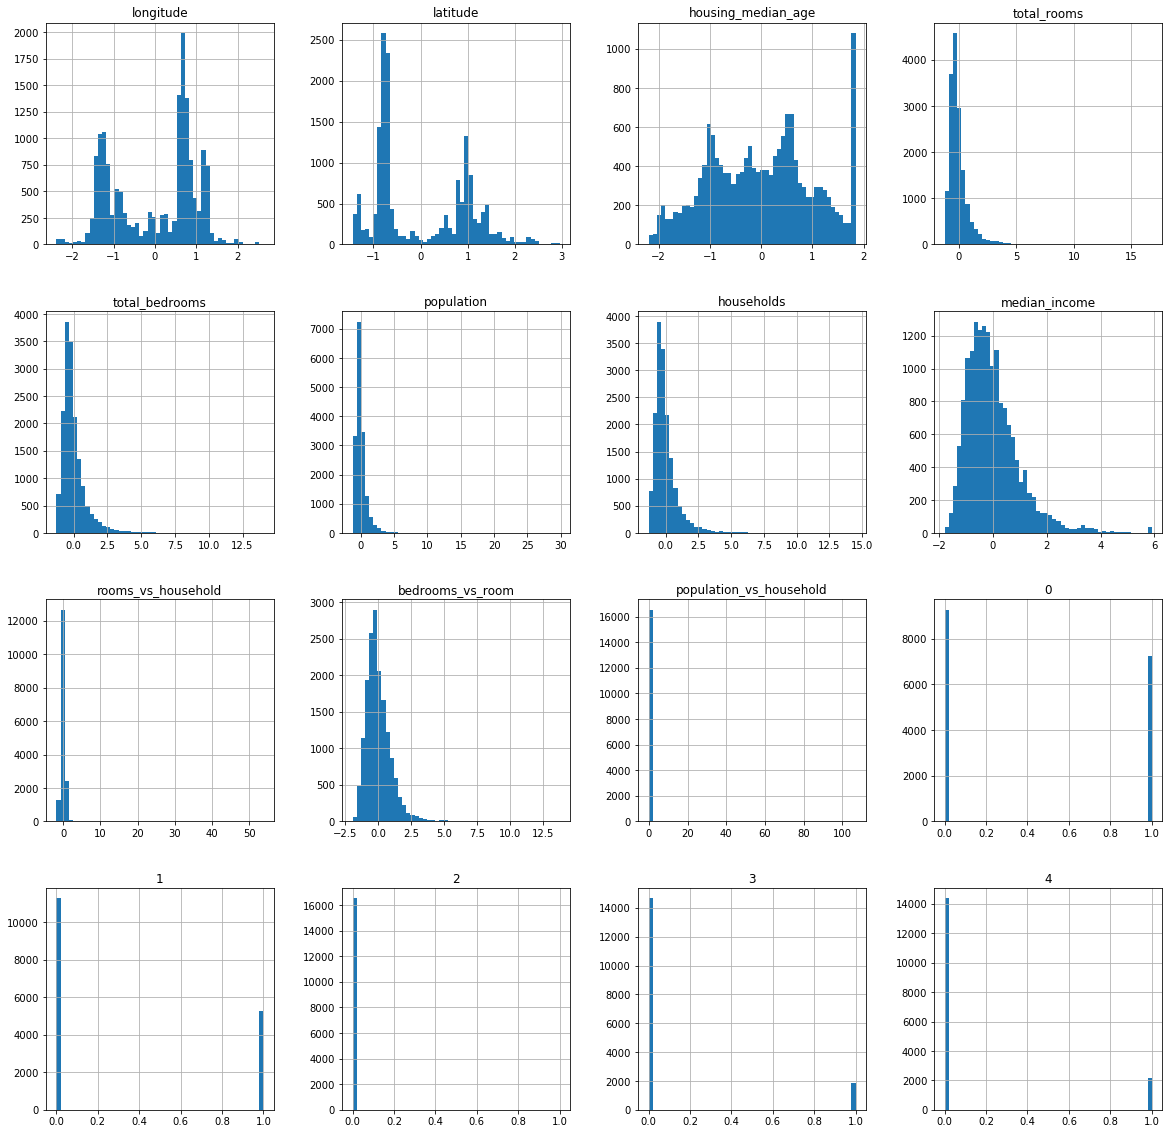

In [52]:
housing_prepared.hist(bins=50, figsize=(20,20))
plt.show()

## 5. Seleccione y entrene el modelo

Notas:
* Si los datos son grandes, es posible que desee probar conjuntos de entrenamiento más pequeños para que pueda entrenar a diferentes modelos en un tiempo razonable (tenga en cuenta que esto penaliza los modelos complejos como las grandes redes neuronales o Random Forest).
* Una vez más, intente automatizar estos pasos tanto como sea posible.


1. Probar multiples modelos rapidamente de diferentes categorías (por ejemplo, lineales, SVM, Random Forest, redes neuronales, etc.)
2. Medir y comparar su rendimiento. Para cada modelo, utilice la validación cruzada N-fold, calcule la media y la desviación estándar.
3. Analizar las variables más significativas para cada algoritmo.
4. Analizar los tipos de errores que cometen los modelos.
5. Tenga una ronda rápida de selección de características
6. Tenga una o dos iteraciones rápidas más de los cinco pasos anteriores.
7. Haga una lista corta de los tres a cinco modelos más prometedores, prefiriendo los modelos que hacen diferentes tipos de errores.


Finalmente estamos listos para seleccionar y entrenar un modelo de M.L.

Vamos a hacer un entrenamiento de un modelo de regresión lineal

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Primero vamos a ver nuestro modelo con algunas intancias

Notese que se esta utilizando la data de entrenamiento, en ningun momento hemos tocado la data de test (por ahora)

In [54]:
alguna_data = housing_prepared.head()
algunos_labels = housing_labels.head()

In [55]:
print("Predicciones:", lin_reg.predict(alguna_data))

Predicciones: [292096. 161664. 523008. 300160. 159104.]


In [56]:
print("Valores Objetivos:", list(algunos_labels))

Valores Objetivos: [500001.0, 170300.0, 500001.0, 244900.0, 146300.0]


In [57]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68384.79314253488

Claramente no es una gran puntuación: los valores medios de la mayoría de los distritos oscilan entre 120000 y 265000 dólares, por lo que un error de predicción de 68376 dólares no es muy satisfactorio.

Este es un ejemplo de un modelo que no se ajusta a los datos de entrenamiento. Cuando esto sucede, puede significar que las características no proporcionan suficiente información para hacer buenas predicciones, o que el modelo no es tan potente.

Como lo mejoramos?

Intentemos un DecisionTreeRegressor, un modelo mas potente capaz de buscar relaciones no lineales en la data

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

¿Ningún error? 
¿Podría este modelo ser realmente perfecto? 

Es muy problame que el problema haya caido en overffiting

### Evaluando de mejor forma con Cross-Validation
Una forma de evaluar el modelo de árbol de decisión sería utilizar la función train_test_split para dividir el conjunto de entrenamiento en un conjunto de entrenamiento más pequeño y un conjunto de validación, luego entrenar los modelos contra los más pequeños y evaluarlos en relación con el conjunto de validación. 

Es un poco de trabajo pero funcionaría bastante bien. Una gran alternativa es utilizar la función de validación cruzada de Scikit-Learn. 

El siguiente código realiza la validación cruzada: divide aleatoriamente el conjunto de entrenamiento en 10 subconjuntos distintos llamados folds, luego entrena y evalúa el modelo de árbol de decisión 10 veces, escogiendo un pliegue diferente para su evaluación cada vez y entrenando en los otros 9 pliegues. 

El resultado es una matriz que contiene las 10 evaluaciones:

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         housing_prepared, 
                         housing_labels,
                         scoring="neg_mean_squared_error", 
                         cv=10)

tree_rmse_scores = np.sqrt(-scores)

Nota: Las características de validación cruzada de Scikit-Learn esperan una función de utilidad (mayor es mejor) en lugar de una función de costo (menor es mejor), por lo tanto
la función de utilidad es en realidad lo contrario de la de error (es decir, un valor negativo), que es por lo que el código se coloca un valor negativo a score

In [61]:
def muestra_scores(scores):
    print("Scores:", scores)
    print("Media:", scores.mean())
    print("Desviacion Estandar:", scores.std())

In [62]:
muestra_scores(tree_rmse_scores)

Scores: [73866.03140118 69134.53633991 67763.00533375 74243.02976365
 71756.27630317 66303.03927697 70030.56278226 73569.9540892
 71162.14855161 70721.14100906]
Media: 70854.97248507518
Desviacion Estandar: 2505.215724959589


Veamos como se evalua nuestro modelo de regresion lineal

In [63]:
lin_scores = cross_val_score(lin_reg, 
                             housing_prepared, 
                             housing_labels,
                             scoring="neg_mean_squared_error", 
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [64]:
muestra_scores(lin_rmse_scores)

Scores: [66591.05767252 73037.18555685 65994.4275413  70043.29074433
 69845.75416161 67651.65384342 66010.89450264 70078.17428728
 71777.05781894 65939.82386925]
Media: 68696.93199981426
Desviacion Estandar: 2470.0721977461294


Vemos que incluso nuestro modelo lineal es mejor que el modelo de arboles de decision

Probemos con un ultimo modelo

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=7, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [66]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

23625.598603694736

In [67]:
forest_scores = cross_val_score(forest_reg, 
                                housing_prepared, 
                                housing_labels,
                                scoring="neg_mean_squared_error", 
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
muestra_scores(forest_rmse_scores)

Scores: [54103.66375451 53525.36039472 51698.98009972 54360.86147577
 56072.9129885  52734.15038215 51739.42126226 54254.79415695
 57512.5810972  51681.92191887]
Media: 53768.464753066735
Desviacion Estandar: 1841.4952774521157


Observamos que random forest obtiene mejores resultados, pero aun tenemos camino que recorrer, normalmente en esta etapa se prueban al menos 5 modelos distintos, para obtener los resultados

Es muy importante que sepamos como guardar un modelo, para esto se utiliza la libreria **joblib**

In [68]:
#from sklearn.externals import joblib
import joblib
# Guardamos el modelo entrenado
joblib.dump(forest_reg, "forest_reg_model.pkl")
# Cargamos el modelo entrenado
forest_reg_cargado = joblib.load("forest_reg_model.pkl")

In [69]:
# Como ya tenemos entrenado podemos utilizarlo para predicciones
# directamente
forest_reg_cargado.predict(housing_prepared)

array([460300.85714286, 165014.28571429, 500001.        , ...,
       266742.85714286, 161714.28571429, 125614.28571429])

## 6. Ajuste Fino a nuestro modelo

Notas:
* Deberá utilizar la mayor cantidad de datos posible para este paso, especialmente a medida que se aproxima el final de fine-tunning.
* Como siempre, automatiza lo que puedas.


1. Ajuste con precisión los hiperparámetros utilizando la validación cruzada.
    * Trate sus opciones de transformación de datos como hiperparámetros, especialmente cuando no esté seguro, por ejemplo, ¿debo reemplazar los valores perdidos con cero o con el valor mediano? o eliminar esas filas
    * A menos que haya muy pocos valores de hiperparámetro que explorar, prefiera la búsqueda aleatoria sobre la cuadrícula búsqueda.
    
2. Pruebe los métodos Ensamble. La combinación de sus mejores modelos a menudo funcionará mejor que la ejecución de los mismos individualmente.
3. Una vez que esté seguro de su modelo final, mida su rendimiento en el set de prueba para estimar el error de generalización.

Hiperparametro: Es el parametro que se ajusta en un modelo antes del entrenamiento, existen muchos hiperparametros, y estos dependen de cada algoritmo.

Una de las formas mas tipicas de ajustar nuestro modelo es cambiar los hiperparametros manualmente, para encontrar los mejores valores, pero esto puede ser un trabajo tedioso
    

### GridSearch

Afortunadamente Scikit-Learn tiene una funcion llamada GridSearchCV que va a realizar la busqueda por nosotros. Todo lo que necesitas hacer es decirle que hiperparametros quieres experimeintasr y evaluara todas las posible combinaciones usando cross-validation.

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Grilla de parametos a probar
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

Cuando no tiene idea del valor que debe tener un hiperparámetro, un enfoque simple es probar potencias consecutivas de 10 (o un
número más pequeño si desea una búsqueda más detallada, como se muestra en este ejemplo con el hiperparámetro n_estimators).

In [72]:
# Definimos nuestra Busqueda en Grilla
# parametros, modelo, grilla de hiperparametros
# cross validation fold
# scoring
grid_search = GridSearchCV(forest_reg_cargado, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

In [73]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=7, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
       

In [74]:
# La mejor combinacion de parametros los encontramos con
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [75]:
# Incluso podemos ver el estimador directamente
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [76]:
# por supuesto tenemos los resultados de la busqueda en grilla
cvres = grid_search.cv_results_
for score_medio, parametros in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-score_medio), parametros)

64206.37909317474 {'max_features': 2, 'n_estimators': 3}
55818.021889981785 {'max_features': 2, 'n_estimators': 10}
53303.23290080673 {'max_features': 2, 'n_estimators': 30}
61344.777002627365 {'max_features': 4, 'n_estimators': 3}
53193.509778763015 {'max_features': 4, 'n_estimators': 10}
50742.09538894824 {'max_features': 4, 'n_estimators': 30}
58017.61389849279 {'max_features': 6, 'n_estimators': 3}
51472.12512569224 {'max_features': 6, 'n_estimators': 10}
49895.75726718032 {'max_features': 6, 'n_estimators': 30}
59025.33696720874 {'max_features': 8, 'n_estimators': 3}
52398.354857708466 {'max_features': 8, 'n_estimators': 10}
50289.09440887368 {'max_features': 8, 'n_estimators': 30}
62763.84118677113 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54345.40905580841 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57901.05571529785 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51669.994228712836 {'bootstrap': False, 'max_features': 3, 'n_estimators

### Randomized Search
Si bien Grid Search esta bien cuando tenemos algunas combinaciones como en el ejemplo anterior, cuando tenemos un espacio busqueda de hiperparametros muy grande es recomendable usar **RandomizedSearchCV**.

Evalúa un número dado de combinaciones aleatorias seleccionando un valor aleatorio para cada hiperparámetro en cada iteración. 

Este enfoque tiene dos objetivos principales beneficios:
* Si deja que la búsqueda aleatoria se ejecute para, 1.000 iteraciones, este enfoque explorará 1.000 valores diferentes para cada hiperparámetro

### Metodos de ensamble

Otra manera de afinar su sistema es tratar de combinar los modelos que mejor funcionan. El ensamble a menudo actuará mejor que el modelo individual (al igual que Random Forests lo hace mejor que los árboles de decisión individuales en los que se basa). Esto lo veremos en profundidad más adelante

### Analiza los mejores modelos y sus errores
Es muy saludable que puedas inspeccionar los mejores modelos, por ejemplo **RandomForestRegressor** puede indicar la importancia relativa de cada atributo para hacer predicciones precisas

In [77]:
caracteristicas_importantes = grid_search.best_estimator_.feature_importances_

In [78]:
caracteristicas_importantes

array([7.41728793e-02, 6.58041784e-02, 4.13782321e-02, 1.70886599e-02,
       1.64508107e-02, 1.76370532e-02, 1.56543940e-02, 3.35071089e-01,
       5.21762235e-02, 8.32054364e-02, 1.06579525e-01, 1.44627567e-02,
       1.51393843e-01, 6.06846595e-05, 3.14140599e-03, 5.72282751e-03])

In [79]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_vs_household',
 'bedrooms_vs_room',
 'population_vs_household']

In [80]:
#Observemos junto a sus respectivos atributos
cat_one_hot_atrib = list(encoder.classes_)
num_atrib = list(housing_num)

In [81]:
atributos = num_atrib + cat_one_hot_atrib

In [82]:
sorted(zip(caracteristicas_importantes, atributos), reverse=True)

[(0.3350710893849952, 'median_income'),
 (0.1513938432666184, 'INLAND'),
 (0.10657952497441388, 'population_vs_household'),
 (0.08320543637808202, 'bedrooms_vs_room'),
 (0.0741728792969192, 'longitude'),
 (0.06580417841008014, 'latitude'),
 (0.052176223472330606, 'rooms_vs_household'),
 (0.041378232052389406, 'housing_median_age'),
 (0.01763705319615978, 'population'),
 (0.01708865990445889, 'total_rooms'),
 (0.016450810734806788, 'total_bedrooms'),
 (0.01565439402915863, 'households'),
 (0.014462756744516997, '<1H OCEAN'),
 (0.005722827505709344, 'NEAR OCEAN'),
 (0.003141405989908512, 'NEAR BAY'),
 (6.068465945221671e-05, 'ISLAND')]

Esta información nos ayudara a eliminar algunas caracteristicas no tan importantes, por ejemplo, de la categoria ocean_proximity solo INLAND es importante por lo que se puede eliminar las demás

### Evaluamos el sistema en el Test Set

Despues de hacer todas esas evaluaciones al modelo y que esten suficientemente bien, vamos a evaluar nuestro modelo final en con el dataset de prueba, recordemos, que el set de prueba no lo hemos tocado mientras que al set de entrenamiento hicimos varias transformaciones, por lo que los dos datasets deben estar en el mismo formato.

In [84]:
# Falta completar una función que haga el proceso de separacion tanto de test como de train
# Queda de trabajo completar la función que haga el proceso de encoding y normalización al estudiante
# Recordar que debemos hacer este proceso con X_test

In [83]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

NameError: name 'strat_test_set' is not defined

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

## 7. Presentar la solución

1. Documente lo que ha hecho.
2. Crea una buena presentación. 
    * Asegúrese de resaltar primero el panorama general.
3. Explique por qué su solución logra el objetivo de negocio.
4. No olvides presentar los puntos interesantes que notaste a lo largo del camino. 
    * Describa lo que funcionó y lo que no funcionó.
    * Enumere sus suposiciones y las limitaciones de su sistema.
5. Asegúrese de que sus hallazgos clave se comunican a través de visualizaciones fáciles de recordar, (por ejemplo, "el ingreso medio es el predictor número uno de los precios de la vivienda").


## 8. Haga el Deploy, Monitoreo y Mantenimiento del sistema

1. Prepare su solución para la producción (conéctela a las entradas de datos de producción, escriba pruebas unitarias, etc.).
2. Escribir código de supervisión para comprobar el rendimiento de su sistema en directo a intervalos regulares y activar alertas cuando cae.
    * También hay que tener cuidado con la lenta degradación: los modelos tienden a "dañarse" a medida que evolucionan los datos.
    * La medición del rendimiento puede requerir una revisión humana (por ejemplo, a través de un servicio de crowdsourcing).
    * También controle la calidad de sus entradas (por ejemplo, un sensor que no funciona correctamente y que envía valores aleatorios). Esto es particularmente importante para el aprendizaje online.
3. Vuelva a entrenar a sus modelos de forma regular con datos nuevos (automatice tanto como sea posible).

